# Evaluate model calibration using folktexts

**Prerequisite**: Install `folktexts` package with optional model API dependencies: `pip install 'folktexts[apis]'`

**Summary**: The script demonstrates how to use folktexts to get insights into model calibration on a **model hosted through a web API**.

### 1. Check folktexts is installed

In [1]:
import folktexts
print(f"{folktexts.__version__=}")

folktexts.__version__='0.1.0'


### 2. Load model API using `litellm`

We use OpenAI's _**GPT-4o-mini**_ model for this demo. The workflow can be similarly applied to any compatible model.

**Note:** _Set_ `model_name` to the model's name. See the `litellm` [list of compatible web-API providers and models](https://docs.litellm.ai/docs/providers/openai#openai-chat-completion-models).

In [2]:
model_name = "openai/gpt-4o-mini"

### 3. Set `OPENAI_API_KEY` environment variable (or key to respective API provider)

In [3]:
from dotenv import load_dotenv
load_dotenv()

True

### 3. Create default benchmarking tasks

We generate ACSIncome benchmark using folktexts. 

**NOTE:** We will subsample the reference data for faster runtime. This should be removed for obtaining reproducible reslts.


### Benchmark configuration
- The `subsampling` and `numeric_risk_prompting` key-word arguments are examples of optional benchmark configurations. See this [page for a list of available configs](https://github.com/socialfoundations/folktexts?tab=readme-ov-file#benchmark-options).

In [4]:
%%time
from folktexts.benchmark import Benchmark, BenchmarkConfig

# Note: This argument is optional. Omit, or set to 1 for reproducible benchmarking on the full data
subsampling_ratio = 0.002

bench = Benchmark.make_acs_benchmark(
    model=model_name,
    task_name="ACSIncome",
    subsampling=subsampling_ratio,
    numeric_risk_prompting=True,
)

Loading ACS data...
Using zero-shot prompting.
CPU times: user 45.7 s, sys: 13.7 s, total: 59.3 s
Wall time: 1min 1s


### 4. Run benchmark

Results will be saved in a folder RESULTS_DIR. There is 
* `.json` file contains evaluated metrics
* `.cvs` file contains risk scores of each datapoint
* folder called `imgs/` contains figures

In [5]:
RESULTS_DIR = "res"
bench.run(results_root_dir=RESULTS_DIR)

Computing risk estimates:   0%|          | 0/21 [00:00<?, ?it/s]

{'threshold': 0.5,
 'n_samples': 333,
 'n_positives': 119,
 'n_negatives': 214,
 'model_name': 'openai/gpt-4o-mini',
 'accuracy': 0.7897897897897898,
 'tpr': 0.7394957983193278,
 'fnr': 0.2605042016806723,
 'fpr': 0.1822429906542056,
 'tnr': 0.8177570093457944,
 'balanced_accuracy': 0.7786264038325611,
 'precision': 0.6929133858267716,
 'ppr': 0.3813813813813814,
 'log_loss': 0.6841978422446943,
 'brier_score_loss': 0.1570022784327027,
 'fpr_ratio': 0.0,
 'fpr_diff': 0.2229299363057325,
 'fnr_ratio': 0.375,
 'fnr_diff': 0.2777777777777778,
 'tpr_ratio': 0.6666666666666666,
 'tpr_diff': 0.2777777777777778,
 'tnr_ratio': 0.7770700636942676,
 'tnr_diff': 0.22292993630573243,
 'balanced_accuracy_ratio': 0.8108672936259144,
 'balanced_accuracy_diff': 0.17337164750957856,
 'accuracy_ratio': 0.8277526395173455,
 'accuracy_diff': 0.1599439775910364,
 'ppr_ratio': 0.43095123128923224,
 'ppr_diff': 0.24324045407636738,
 'precision_ratio': 0.6788990825688074,
 'precision_diff': 0.3211009174311926

### 4. Visualize results

We can also visualize the results inline:

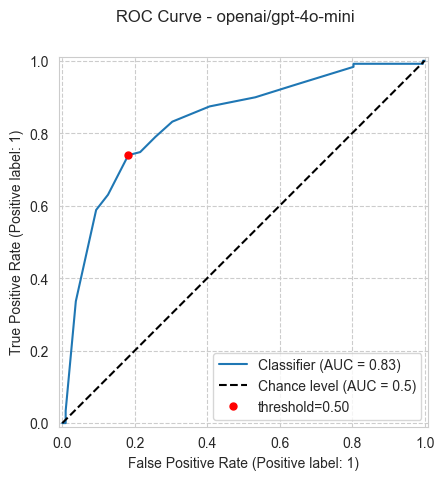

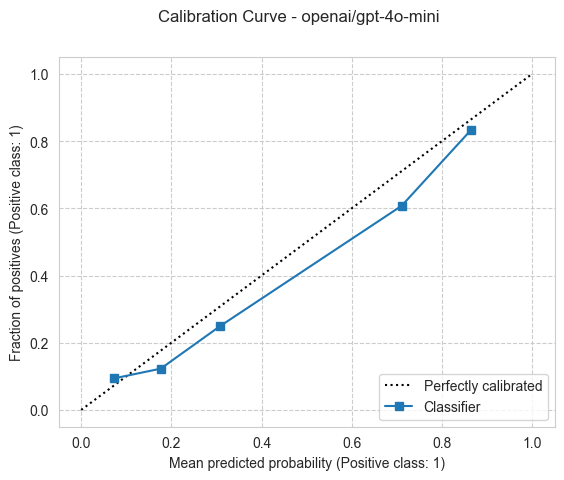

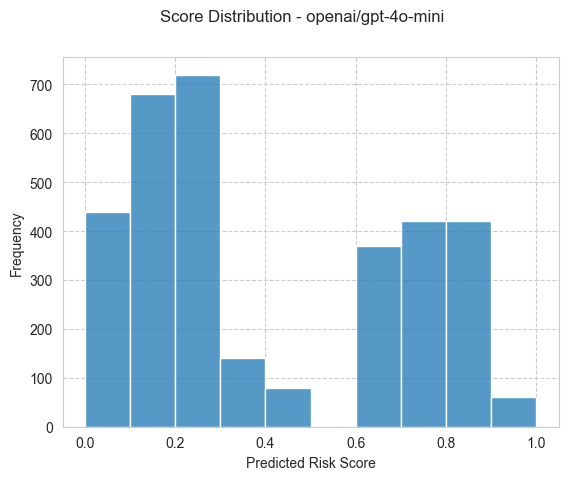

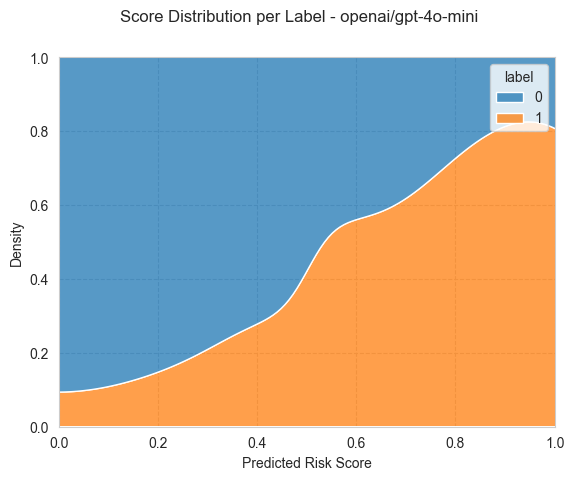

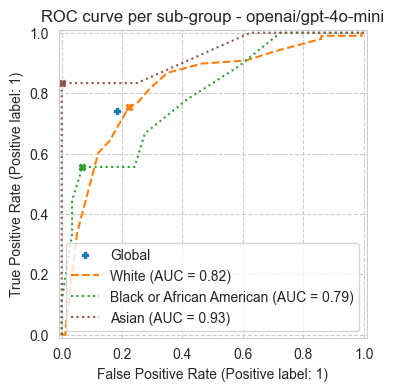

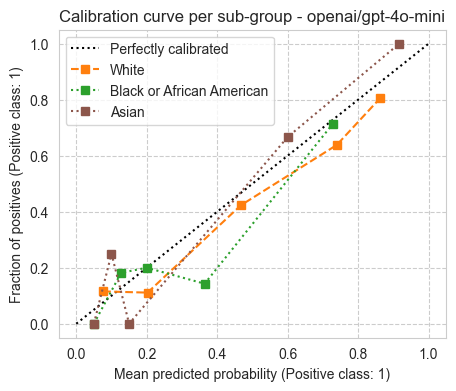

{'roc_curve_path': '/Users/acruz/Documents/folktexts/notebooks/res/openai/gpt-4o-mini_bench-4104804744/imgs/roc_curve.pdf',
 'calibration_curve_path': '/Users/acruz/Documents/folktexts/notebooks/res/openai/gpt-4o-mini_bench-4104804744/imgs/calibration_curve.pdf',
 'score_distribution_path': '/Users/acruz/Documents/folktexts/notebooks/res/openai/gpt-4o-mini_bench-4104804744/imgs/score_distribution.pdf',
 'score_distribution_per_label_path': '/Users/acruz/Documents/folktexts/notebooks/res/openai/gpt-4o-mini_bench-4104804744/imgs/score_distribution_per_label.pdf',
 'roc_curve_per_subgroup_path': '/Users/acruz/Documents/folktexts/notebooks/res/openai/gpt-4o-mini_bench-4104804744/imgs/roc_curve_per_subgroup.pdf',
 'calibration_curve_per_subgroup_path': '/Users/acruz/Documents/folktexts/notebooks/res/openai/gpt-4o-mini_bench-4104804744/imgs/calibration_curve_per_subgroup.pdf'}

In [6]:
bench.plot_results()

---